In [1]:
# imports
import pandas as pd
import numpy as np
import pickle

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# loading the data

# river_isouptree
with open("results/river_isouptree.pkl", "rb") as f:
    re_isoup = pickle.load(f)

# river_st_particular
with open("results/river_st_particular.pkl", "rb") as f:
    re_sp = pickle.load(f)

# river_st_general (still working)
with open("results/river_st_general.pkl", "rb") as f:
    re_sg = pickle.load(f)

# sklearn_particular
with open("results/sklearn_particular.pkl", "rb") as f:
    re_bp = pickle.load(f)

# sklearn_general (still working)
with open("results/sklearn_general.pkl", "rb") as f:
    re_bg = pickle.load(f)


In [6]:
methods_b = [
    'LinReg',
    'DT',
    'RF',
    'GBT',
    #'MLP'
]

methods_s = [    
    'KNN',
    'HT',
    'HAT',
    'ARF'
]

methods_i = [
    'iSOUPTree'
]

sensors = [1, 24, 35, 43, 68, 103, 105, 106, 108, 109, 110, 116, 117, 122, 124, 144, 145, 157, 168, 177,
    179, 223, 225, 236, 239, 245, 249, 253, 257, 259, 262, 285, 286, 290, 293, 301, 303, 312, 358, 359, 362,
    365, 367, 377, 378, 379, 382, 384, 385, 388, 389, 391, 392, 394, 395]
horizons = [ 0.25, 0.5, 0.75, 1, 3, 6, 12, 24, 36 ]

In [7]:
# specialized features

# packing single-target results into JSON structure
def add_results_st(d, methods, re, prefix=''):
    
    for m in methods:
        d[prefix + m] = []
        for s in sensors:
            # list all records
            data = list(filter(lambda x: x['sensor'] == s and x['model'] == m, re))
            values = []
            for i in range(len(data)):
                val = data[i]['r208'][-1]
                if (val > -10):
                    values.append(val)            
            d[prefix + m].append(np.mean(values))            
            
    return d

def add_results_st_b(d, methods, re, prefix=''):
    for m in methods:
        d[prefix + m] = []
        for s in sensors:
            # list all records
            data = list(filter(lambda x: x['sensor'] == s and x['model'] == m, re))
            values = []
            for i in range(len(data)):
                val = np.mean(data[i]['r2'][40:50])
                if (val > -10):
                    values.append(val)            
            d[prefix + m].append(np.mean(values))            
            
    return d
    
    
# packing results in a dataframe
def pack_results():
    # get R2 for iSOUPTree
    isouptree_r = []
    isouptree_r2 = []
    for s in sensors:
        data = list(filter(lambda x: x['sensor'] == s, re_isoup))[0]        
        isouptree_r.append(data['r208'][-1])
        isouptree_r2.append(data['r2'][-1])
    
    d = { 'sensors': sensors, 'iSOUPTree': isouptree_r}    
    
    # get R2 for single target streaming
    d = add_results_st(d, methods_s, re_sp)    
    
    # get R2 for single target batch
    d = add_results_st_b(d, methods_b, re_bp, "batch ")
        
    rdf = pd.DataFrame(data = d)
    return rdf
    
rdf = pack_results()
rdf

,sensors,iSOUPTree,KNN,HT,HAT,ARF,batch LinReg,batch DT,batch RF,batch GBT
0,1,0.678527,0.775394,0.846638,0.828925,0.865333,0.508076,0.826874,0.860384,0.855727
1,24,0.812652,0.619333,0.762737,0.681011,0.851904,0.504492,0.801342,0.843966,0.814763
2,35,0.918603,0.862044,0.896889,0.913060,0.938681,0.609206,0.936961,0.946033,0.938179
3,43,0.609757,0.502018,0.671986,0.598484,0.686860,0.352792,0.603423,0.707629,0.670164
4,68,0.654130,0.276920,0.561519,0.484700,0.585575,0.477414,0.458894,0.522988,0.578218
5,103,-0.000128,0.361511,0.602703,0.561467,0.628106,0.070164,0.730714,0.778518,0.776728
6,105,-0.051172,0.394588,0.666853,0.613355,0.633771,0.077203,0.672708,0.709876,0.717345
7,106,0.656681,0.388300,0.661321,0.629368,0.679855,0.334182,0.620598,0.624839,0.633413
8,108,0.708961,0.570340,0.727628,0.715203,0.772489,0.294484,0.695416,0.749816,0.725151
9,109,0.647647,0.549392,0.636093,0.630094,0.736470,0.397636,0.343120,0.574702,0.598621


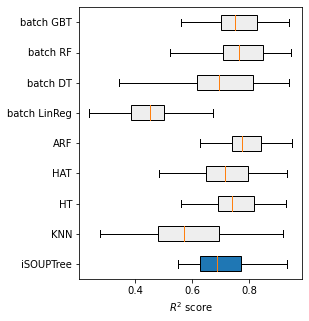

In [118]:
#rdf.pop("sensors")
# visualize
fig = plt.figure(figsize=(4, 5))
#fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
bp = plt.boxplot(rdf, showfliers=False, vert=False, patch_artist=True)
for i in range(8):
    bp['boxes'][i+1].set(facecolor="#eeeeee")
ax.set_yticklabels(rdf.columns)
ax.set_xlabel("$R^2$ score")
plt.savefig("local_features_comparison.pdf", bbox_inches="tight")
plt.show()

No 'sensors' field.


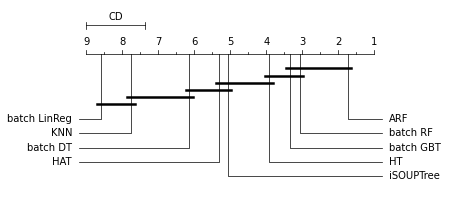

In [15]:
from autorank import autorank, plot_stats, create_report, latex_table
try:   
    #rdf.pop("batch LinReg")
    #rdf.pop("batch DT")
    #rdf.pop("batch GBT")
    #rdf.pop("batch RF")
    rdf.pop("sensors")
except:
    print("No 'sensors' field.")
    
data = pd.DataFrame()

for a in rdf:
    for i in rdf[a]:
        data[a] = i
        
result = autorank(rdf, alpha=0.05)

plot_stats(result)
plt.savefig("autorank_local.pdf", bbox_inches="tight")
plt.show()

In [11]:
# general features

# packing single-target results into JSON structure
def add_results_st(d, methods, re, prefix=''):
    
    for m in methods:
        d[prefix + m] = []
        for s in sensors:
            # list all records
            data = list(filter(lambda x: x['sensor'] == s and x['model'] == m, re))
            values = []
            for i in range(len(data)):
                val = data[i]['r208'][-1]
                if (val > -10):
                    values.append(val)            
            d[prefix + m].append(np.mean(values))            
            
    return d

def add_results_st_b(d, methods, re, prefix=''):
    for m in methods:
        d[prefix + m] = []
        for s in sensors:
            # list all records
            data = list(filter(lambda x: x['sensor'] == s and x['model'] == m, re))
            values = []
            for i in range(len(data)):
                val = np.mean(data[i]['r2'][40:50])
                if (val > -10):
                    values.append(val)            
            d[prefix + m].append(np.mean(values))            
            
    return d
    
    
# packing results in a dataframe
def pack_results():
    # get R2 for iSOUPTree
    isouptree_r = []
    isouptree_r2 = []
    for s in sensors:
        data = list(filter(lambda x: x['sensor'] == s, re_isoup))[0]        
        isouptree_r.append(data['r208'][-1])
        isouptree_r2.append(data['r2'][-1])
    
    d = { 'sensors': sensors, 'iSOUPTree': isouptree_r}    
    
    # get R2 for single target streaming
    d = add_results_st(d, methods_s, re_sg)    
    
    # get R2 for single target batch
    d = add_results_st_b(d, methods_b, re_bg, "batch ")
        
    rdf = pd.DataFrame(data = d)
    return rdf
    
grdf = pack_results()

grdf.iloc[5, grdf.columns.get_loc("batch LinReg")] = 0.6

grdf

C:\Users\klemen\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\klemen\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,sensors,iSOUPTree,KNN,HT,HAT,ARF,batch LinReg,batch DT,batch RF,batch GBT
0,1,0.678527,0.523252,0.724177,0.651968,0.725978,0.651221,0.757814,0.882427,0.873944
1,24,0.812652,0.806681,0.806770,0.780767,0.850830,0.644172,0.775228,0.882307,0.844449
2,35,0.918603,0.907463,0.908322,0.897502,0.934521,0.832737,0.926892,0.960461,0.950078
3,43,0.609757,0.588228,0.650373,0.594276,0.671819,0.495385,0.541431,0.768928,0.719866
4,68,0.654130,0.560797,0.615189,0.577391,0.729576,0.543857,0.346383,0.700703,0.731191
5,103,-0.000128,0.374376,0.516966,0.471924,0.549304,0.600000,0.677620,0.814888,0.784608
6,105,-0.051172,0.468218,0.629681,0.599503,0.656159,0.570479,0.665799,0.839385,0.822555
7,106,0.656681,0.559730,0.674532,0.592324,0.710747,0.487574,0.464918,0.657529,0.711533
8,108,0.708961,0.557174,0.661543,0.643444,0.676245,0.507717,0.639974,0.817137,0.778158
9,109,0.647647,0.632029,0.671750,0.655750,0.759980,0.553729,0.276864,0.603545,0.634718


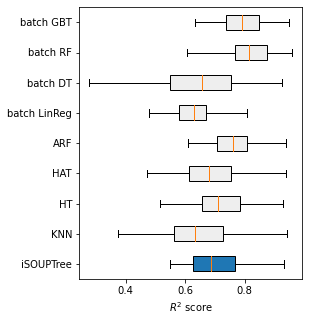

In [180]:
grdf.pop("sensors")
# visualize
fig = plt.figure(figsize=(4, 5))
#fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
bp = plt.boxplot(grdf, showfliers=False, vert=False, patch_artist=True)
for i in range(8):
    bp['boxes'][i+1].set(facecolor="#eeeeee")
ax.set_yticklabels(grdf.columns)
ax.set_xlabel("$R^2$ score")
plt.savefig("general_features_comparison.pdf", bbox_inches="tight")
plt.show()

No 'sensors' field.


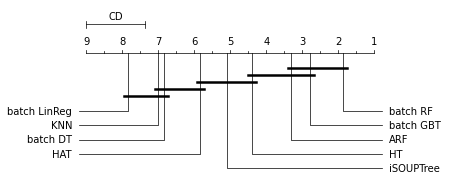

In [14]:
from autorank import autorank, plot_stats, create_report, latex_table
try:   
    #rdf.pop("batch LinReg")
    #rdf.pop("batch DT")
    #rdf.pop("batch GBT")
    #rdf.pop("batch RF")
    grdf.pop("sensors")
except:
    print("No 'sensors' field.")
    
data = pd.DataFrame()

for a in grdf:
    for i in grdf[a]:
        data[a] = i
        
result = autorank(grdf, alpha=0.05)

plot_stats(result)
plt.savefig("autorank_global.pdf", bbox_inches="tight")
plt.show()

In [13]:
grdf.describe()

,iSOUPTree,KNN,HT,HAT,ARF,batch LinReg,batch DT,batch RF,batch GBT
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,0.675609,0.638745,0.706567,0.678222,0.720338,0.634039,0.635506,0.809578,0.789068
std,0.197311,0.160026,0.153751,0.165407,0.274009,0.100885,0.171118,0.083549,0.076510
min,-0.051172,-0.080680,-0.200756,-0.267464,-1.168030,0.392085,0.090712,0.603545,0.573020
25%,0.626962,0.564044,0.656616,0.612865,0.708051,0.579110,0.547617,0.768316,0.739174
50%,0.687482,0.633548,0.710559,0.679381,0.759980,0.630403,0.655523,0.815509,0.790639
75%,0.769518,0.727774,0.783537,0.754323,0.807109,0.671007,0.754984,0.876115,0.848923
max,0.932234,0.944756,0.928850,0.938242,0.939431,0.887885,0.926892,0.960461,0.950078


In [139]:
# compare time series
s = 391
data_i = list(filter(lambda x: x['sensor'] == s, re_isoup))[0]["r2"]

In [200]:
len(data_sx)

9

In [202]:
# not finished 

m = 'HT'
data_sx = list(filter(lambda x: x['sensor'] == s and x['model'] == m, re_sp))
# average over horizons
data_s = []
summa = 0
n = 0

i = 0
for val in data_sx[0]["r2"]:
    # print(val)
    summa = 0
    for e in data_sx:
        summa = summa + e["r2"][i]

    i = i + 1
    print(i, summa/9)
    
m = 'DT'
data_bx = list(filter(lambda x: x['sensor'] == s and x['model'] == m, re_bp))[0]["r2"]
data_b = []
summa = 0
n = 0
for val in data_bx:
    i = i + 1
    summa = summa + val
    avg = summa/i
    data_b.append(avg)
    

1 0.3579671952009298
2 0.41659047311926867
3 0.48836797925473463
4 0.5227628345428423
5 0.5165852504006551
6 0.5279128328597401
7 0.5499954952527605
8 0.5657290062466285
9 0.5915735472782624
10 0.6167581155873586
11 0.6371504300258606
12 0.6465388450298627
13 0.6723956081355599
14 0.688574927379482
15 0.7049858338822479
16 0.7133204827156031
17 0.7143776328560969
18 0.7207152281117841
19 0.7220809358965831
20 0.7275407270414032
21 0.7283683715741778
22 0.733598716646483
23 0.7261017755905419
24 0.7252828495091665
25 0.72351084609086
26 0.7216375158755249
27 0.7210194507145464
28 0.7202141428671022
29 0.7155927194052681
30 0.714312629805405
31 0.716403036405739
32 0.7149194682946758
33 0.717974795154531
34 0.7213763768752186
35 0.7245837914106793
36 0.7265456616995374
37 0.7265929336981226
38 0.7291067940340331
39 0.733304631292977
40 0.7384976565992456
41 0.7431535525653149
42 0.7472735358775877
43 0.7500268078958585
44 0.7522925266822006
45 0.7537138791319623
46 0.7535667890605051
47 

IndexError: list index out of range

In [195]:
list(filter(lambda x: x['sensor'] == s and x['model'] == m, re_bp))[1]

{'sensor': 391,
 'horizon': 0.5,
 'model': 'DT',
 'mape': [0.14386554391412246,
  0.1267616065747347,
  0.09635001439655959,
  0.09876450681313921,
  0.07559752488724836,
  0.07730764549861671,
  0.08494135079849445,
  0.07568507829754625,
  0.07829222350474341,
  0.08214550327332985,
  5.048009312864759e+17,
  0.1053153366692909,
  0.06773025109230683,
  0.08134536770367319,
  0.05909077053929449,
  0.07697286857605054,
  0.060706368483641304,
  0.06857612325660184,
  0.06782716912061745,
  0.07202934536851788,
  0.06494398900925268,
  0.07818848161506337,
  0.06863647940069072,
  0.0729656882283075,
  0.074819251948385,
  0.07835600475889704,
  0.08352720573208129,
  0.11615661019209013,
  0.06749866941348921,
  0.06967400756959244,
  0.06859230166614544,
  0.06704321862421143,
  0.06713315293563593,
  0.07559710455033855,
  0.07018876960462733,
  0.08294419538396763,
  0.0559450011437524,
  0.0634824454410483,
  0.06189194186338164,
  0.05963808794561338,
  0.0585314412788577,
  0.0

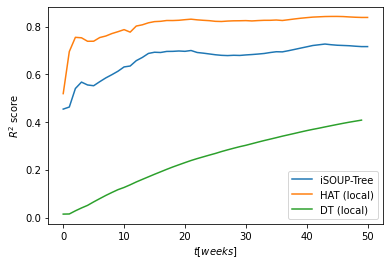

In [160]:
fig2 = plt.figure()
ax = fig2.add_subplot(111)

ax.plot(data_i, label="iSOUP-Tree")
ax.plot(data_s, label="HAT (local)")
ax.plot(data_b, label="DT (local)")

ax.set_ylabel("$R^2$ score")
ax.set_xlabel("$t [weeks]$")
plt.legend()
#plt.savefig("local_features_comparison.pdf", bbox_inches="tight")
plt.show()

